<div>
    <div style="float:left;width:50%;text-align:center">
        <h1>pyGIMLi Tutorial @ Transform 2021</h1>
        <div>
<table style="border-collapse:collapse;border-color:#ccc;border-spacing:0" class="tg"><thead><tr><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal"></th><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Info</th></tr></thead><tbody><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">When</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Live: Monday, April 19 • 8:00 - 9:00 UTC</td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Slack (Q&amp;A)</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://softwareunderground.org/">Software Underground</a> channel <a href="https://swung.slack.com/archives/C01T5V5S9EV">#t21-mon-pygimli</a></td></tr><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Recording</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://www.youtube.com/watch?v=w3pu0H3dXe8&t=2899s">https://www.youtube.com/watch?v=w3pu0H3dXe8&t=2899s</a></td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">pyGIMLi documentation</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://www.pygimli.org/documentation.html">https://www.pygimli.org/documentation.html</a></td></tr></tbody></table>
        </div>
    </div>
    <div style="float:right;width:30%">
        <img src="https://www.pygimli.org/_images/pg_logo.png" alt="pyGIMLi logo">
    </div>
</div>

---
# Simulating crosshole traveltime measurements

## Objectives

In this tutorial, we want to:
1. Read the geometry created in the [first notebook](./1_Creating_a_subsurface_model.ipynb)
2. Define two wells with seismic sources and receivers
3. Populate the subsurface model with parameters (seismic slownesses)
4. Simulate traveltime measurements with noise

---

In [2]:
# Just some plotting settings
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-notebook")
%config InlineBackend.figure_format='svg' # Setting figure format for this notebook

## Read in the previously defined geometry

We start by reading in the geometry defined in [the first notebook](./1_Creating_a_subsurface_model.ipynb) using the [`mt.readPLC` function](https://www.pygimli.org/pygimliapi/_generated/pygimli.meshtools.html?highlight=readplc#pygimli.meshtools.readPLC).

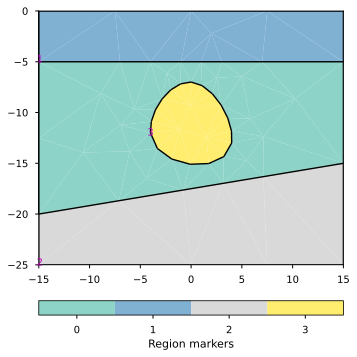

In [3]:
import pygimli as pg
import pygimli.meshtools as mt
import pygimli.physics.traveltime as tt

geometry = mt.readPLC("data/geometry.poly")
geometry.scale([0.5, 1, 1])

ax, _ = pg.show(geometry)

## Define source and receiver positions

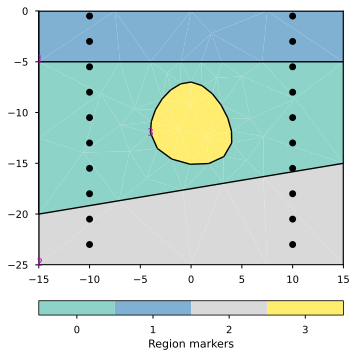

In [4]:
import numpy as np

n = 10 # number of sources and receivers per borehole
borehole = np.ones((n, 2)) * 10 # right borehole at x = 10 m
borehole[:,1] = np.linspace(-.5, -23, n) # down to 23 m depth

sensors = np.vstack([borehole] * 2)
sensors[n:,0] *= -1 # left borehole at x = -10 m

ax.plot(sensors[:,0], sensors[:,1], "ko")
ax.figure

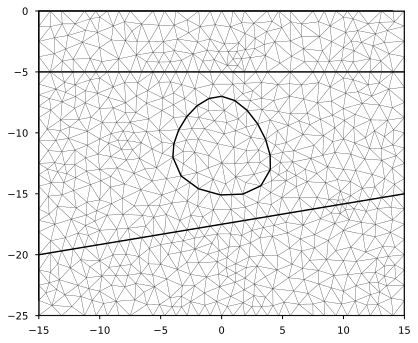

In [5]:
for pos in sensors:
    geometry.createNode(pos)
    
mesh = mt.createMesh(geometry, quality=33.5, area=1)
pg.show(mesh);

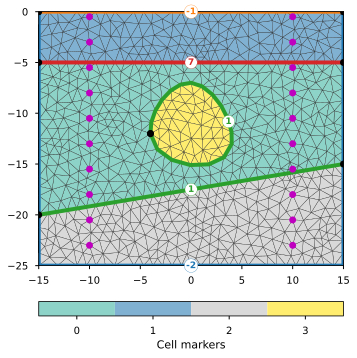

In [6]:
ax, _ = pg.show(mesh, markers=True, showMesh=True)
ax.plot(sensors[:,0], sensors[:,1], "mo");

## Create measurement schedule

In [7]:
scheme = tt.createCrossholeData(sensors)
print(scheme)
print(scheme.sensor(0))
np.column_stack((pg.x(scheme), pg.y(scheme)))

Data: Sensors: 20 data: 100, nonzero entries: ['g', 's', 'valid']
RVector3: (10.0, -0.5, 0.0)


array([[ 10. ,  -0.5],
       [ 10. ,  -3. ],
       [ 10. ,  -5.5],
       [ 10. ,  -8. ],
       [ 10. , -10.5],
       [ 10. , -13. ],
       [ 10. , -15.5],
       [ 10. , -18. ],
       [ 10. , -20.5],
       [ 10. , -23. ],
       [-10. ,  -0.5],
       [-10. ,  -3. ],
       [-10. ,  -5.5],
       [-10. ,  -8. ],
       [-10. , -10.5],
       [-10. , -13. ],
       [-10. , -15.5],
       [-10. , -18. ],
       [-10. , -20.5],
       [-10. , -23. ]])

## Parameterize the subsurface

Now we populate the subsurface with property values on a cell-by-cell basis. We assign values of velocities to all of the cells using `mesh.cellMarkers()`. Note that the markers in this case, start with 0 which works because numpy uses 0 based indexing.

In [8]:
# vmap = [[0, 800], [1, 500], [2, 1000], [3, 2000]] # or populate it directly
v = np.array([800,500,1000,2000])[mesh.cellMarkers()] # Velocities for 4 markers

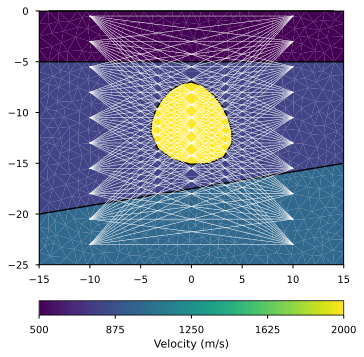

In [9]:
ax, _ = pg.show(mesh, v, label=pg.unit("vel"));

shots = scheme["s"]
geophones = scheme["g"]

for s, g in zip(shots, geophones):
    ray = np.array([s, g])
    ax.plot(sensors[ray, 0], sensors[ray, 1], "w-", lw=0.5)

## Simulate traveltime measurements

The [`TravelTimeManager()`](https://www.pygimli.org/pygimliapi/_generated/pygimli.physics.traveltime.html?highlight=traveltimemanager#pygimli.physics.traveltime.TravelTimeManager) class and method manager for travel time tomography. Below we are using the `mgr.simulate` function. We explain more about the TravelTime Manager in the [next notebook](./4_Traveltime_inversion.ipynb) 

In [14]:
mgr = tt.TravelTimeManager()
data = mgr.simulate(mesh=mesh, scheme=scheme, slowness=1/v,
                   secNodes=4, noiseLevel=0.001, noiseAbs=1e-5, seed=1337)
print(data)
data.save("data/traveltime.dat")

20/03/24 - 13:27:00 - pyGIMLi - INFO - Creating refined mesh (secnodes: 4) to solve forward task.


Data: Sensors: 20 data: 100, nonzero entries: ['err', 'g', 's', 't', 'valid']


1

In [11]:
np.column_stack((data["s"], data["g"], data["t"]))[:12]

array([[ 0.        , 10.        ,  0.03825934],
       [ 0.        , 11.        ,  0.03408472],
       [ 0.        , 12.        ,  0.03049941],
       [ 0.        , 13.        ,  0.02950028],
       [ 0.        , 14.        ,  0.02915859],
       [ 0.        , 15.        ,  0.02932699],
       [ 0.        , 16.        ,  0.03046252],
       [ 0.        , 17.        ,  0.0320365 ],
       [ 0.        , 18.        ,  0.03336778],
       [ 0.        , 19.        ,  0.03461089],
       [ 1.        , 10.        ,  0.03414275],
       [ 1.        , 11.        ,  0.02988183]])

---
### Appendix
We will have a closer look into the simulated data.

In [12]:
# First retrieve the shot-geophone distances
dist = tt.shotReceiverDistances(data, full=True)
# Next compute apparent velocity by dividing it through the traveltimes
va = dist / data["t"]
# plt.hist(va, bins=30);

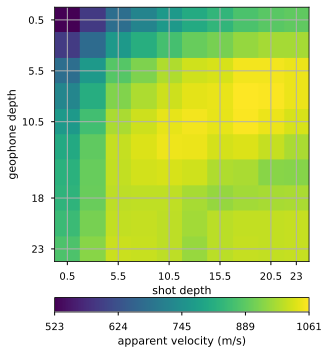

In [13]:
from pygimli.viewer.mpl import showDataContainerAsMatrix, showVecMatrix

d = -pg.y(data)  # sensor depth
ds = d[data["s"]]  # shot depth
dg = d[data["g"]]  # geophone depth
ax, cb = showVecMatrix(ds, dg, va, label="apparent velocity (m/s)");
ax.set_xlabel("shot depth");
ax.set_ylabel("geophone depth");